In [15]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 읽기
gdf = gpd.read_file("LARD_ADM_SECT_SGG_26_202405.shp")
cluster_data = pd.read_csv("시간대별_부산군구_군집분석결과.csv")

In [17]:
# 2. 열 이름 변경
gdf = gdf.rename(columns={'SGG_NM': '구군'})  # 'SGG_NM'을 '구군'으로 변경

to_gungu = {
    '부산광역시 강서구': '강서구',
    '부산광역시 금정구': '금정구',
    '부산광역시 기장군': '기장군',
    '부산광역시 남구': '남구',
    '부산광역시 동구': '동구',
    '부산광역시 동래구': '동래구',
    '부산광역시 부산진구': '부산진구',
    '부산광역시 북구': '북구',
    '부산광역시 사상구': '사상구',
    '부산광역시 사하구': '사하구',
    '부산광역시 서구': '서구',
    '부산광역시 수영구': '수영구',
    '부산광역시 연제구': '연제구',
    '부산광역시 영도구': '영도구',
    '부산광역시 중구': '중구',
    '부산광역시 해운대구': '해운대구'
}

# 관할 경찰서를 군구로 매핑
gdf['구군'] = gdf['구군'].map(to_gungu)


In [18]:
# 데이터 병합
gdf = gdf.merge(cluster_data[['구군', 'Cluster']], on='구군')

In [19]:
# 3. 클러스터별 색상 지정
cluster_colors = {0: '#70C6F5', 1: '#4B7CB6', 2: '#02428C', 3: '#BCE2E8'}  # 클러스터별 색상
gdf['color'] = gdf['Cluster'].map(cluster_colors)  # Cluster 값을 color로 매핑

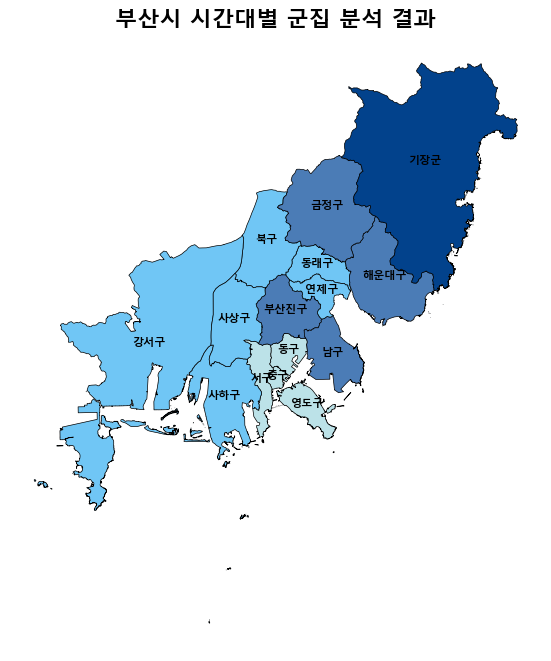

In [20]:
# 4. 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# GeoDataFrame 플롯 (직접 지정한 색상 사용)
gdf.plot(color=gdf['color'], ax=ax, edgecolor='black', linewidth=0.5)

# 군구 이름 표시
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['구군']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold')

# 제목 추가
plt.title("부산시 시간대별 군집 분석 결과", fontsize=16, fontweight='bold')

# 축 제거
plt.axis('off')

# 결과 저장 (png 형식으로 저장)
plt.savefig("부산시_시간별_군집분석결과.png", dpi=300, bbox_inches='tight')  # 고해상도 저장

# 결과 출력
plt.show()